In [1]:
#Prevent Large File crashing on Jupyter Notebook
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import pandas as pd
import numpy as np
#import vaex, numpy as np
from matplotlib.font_manager import FontProperties
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import datetime
import warnings 
#sns.set_style("darkgrid",{"axes.axisbelow" : False })
warnings.simplefilter('ignore')
import string

# Data Exploration

In [3]:
amazon = pd.read_csv('am_metadata_sample.csv')
gr     = pd.read_csv('gr_metadata_sample.csv')

### Checking missing value

In [4]:
amazon.isnull().sum()

asin                    0
average                 0
rating_count            0
text_reviews_count      0
genres                  0
rank                    0
verifiedTrue_count      0
Format                 23
am_countText_before     0
am_countText_after      0
dtype: int64

In [5]:
gr.isnull().sum()

asin                          0
average_rating                0
ratings_count                 0
reviews_count                 0
text_reviews_count            0
total_ratings_count           0
total_reviews_count           0
total_text_reviews_count      0
publication_year            193
publication_month           351
publication_day             404
publisher                   200
num_pages                   226
format                      202
description                 161
cleaned_description         313
gr_countDes_before          161
gr_countDes_after           313
cleaned_genres               12
gr_countText_before           0
gr_countText_after            0
dtype: int64

# Plot the distribution of the average rating 

In [6]:
amazon.describe()

,average,rating_count,text_reviews_count,rank,verifiedTrue_count,am_countText_before,am_countText_after
count,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.00000,5.000000e+03,5.000000e+03
mean,4.259282,205.289400,205.24160,2.255942e+06,141.74540,1.713156e+04,8.085176e+03
std,0.429461,1017.304561,1017.04717,2.862520e+06,844.68857,6.413394e+04,2.962347e+04
min,1.710000,6.000000,6.00000,3.460000e+02,0.00000,1.350000e+02,6.800000e+01
25%,4.040000,23.000000,23.00000,4.877608e+05,11.00000,2.346750e+03,1.119750e+03
50%,4.330000,46.000000,46.00000,1.287830e+06,26.00000,4.917000e+03,2.346500e+03
75%,4.570000,126.000000,126.00000,2.844100e+06,78.00000,1.231250e+04,5.883000e+03
max,5.000000,44381.000000,44368.00000,2.033386e+07,39851.00000,2.384912e+06,1.082212e+06


In [7]:
gr.describe()

,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,publication_day,num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,4807.000000,4649.000000,4596.000000,4774.000000,4839.000000,4687.000000,5000.00000,5000.000000
mean,3.904638,2096.221400,3920.327800,112.544600,2.042337e+04,3.095409e+04,848.552600,2002.236530,6.315337,13.510879,329.932132,149.658400,81.607425,2004.75780,887.822400
std,0.292021,10362.688039,18551.880648,470.918927,1.355211e+05,1.650722e+05,4145.522882,9.531886,3.372324,10.806322,224.750505,95.918581,53.407555,7611.45056,3319.335453
min,2.380000,0.000000,0.000000,0.000000,7.000000e+00,2.000000e+01,1.000000,1900.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.00000,1.000000
25%,3.730000,54.000000,117.000000,7.000000,3.110000e+02,7.700000e+02,31.000000,2000.000000,3.000000,2.000000,229.000000,81.000000,42.000000,113.00000,52.000000
50%,3.920000,167.000000,379.500000,19.000000,1.279500e+03,2.817500e+03,100.000000,2004.000000,6.000000,12.000000,320.000000,135.000000,73.000000,383.00000,174.000000
75%,4.110000,665.000000,1492.000000,62.000000,6.013000e+03,1.168175e+04,361.250000,2007.000000,9.000000,25.000000,400.000000,192.000000,105.000000,1240.50000,559.250000
max,4.890000,348674.000000,686353.000000,15360.000000,4.255389e+06,4.878002e+06,106728.000000,2019.000000,12.000000,31.000000,8430.000000,1166.000000,567.000000,234148.00000,103340.000000


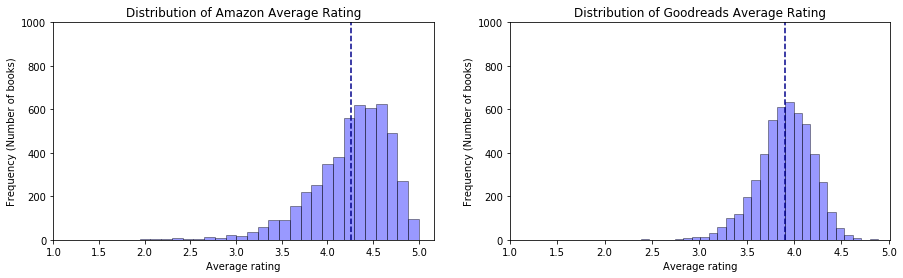

In [8]:
fig,ax=plt.subplots(1, 2, figsize=(15,4))

# Distribution of Amazon Average Rating
sns.distplot(amazon.average, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'},
            ax=ax[0])
ax[0].set_title('Distribution of Amazon Average Rating')
ax[0].axvline(amazon.describe().average['mean'], 0, color='darkblue', linestyle='--')

# Distribution of Goodreads Average Rating
sns.distplot(gr.average_rating, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'},
            ax = ax[1])
ax[1].set_title('Distribution of Goodreads Average Rating')
ax[1].axvline(gr.describe().average_rating['mean'], 0, color='darkblue', linestyle='--')

# Making plots uniform for easier side-by-side comparison
for i in range(2):
    ax[i].set_xlabel('Average rating')
    ax[i].set_ylabel('Frequency (Number of books)')
    ax[i].set_xticks(np.arange(1,5.5,0.5))
    ax[i].set_ylim(0,1000,1000)

plt.show()

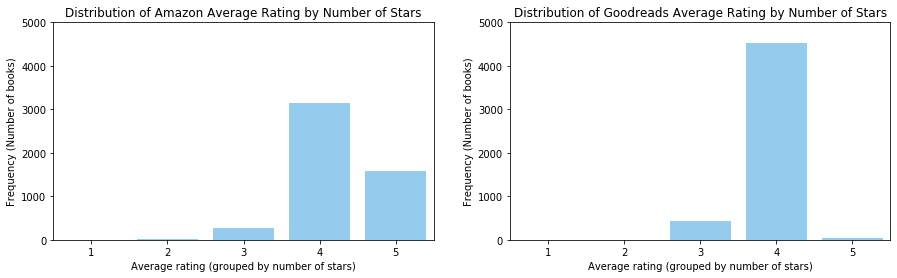

In [9]:
fig,ax=plt.subplots(1, 2, figsize=(15,4))

# Distribution of Amazon Average Rating by Number of Stars
sns.countplot(x=np.round(amazon.average,0),  order=list(range(1,6)), color='lightskyblue', ax=ax[0])
ax[0].set_title('Distribution of Amazon Average Rating by Number of Stars')

# Distribution of Goodreads Average Rating by Number of Stars
sns.countplot(x=np.round(gr.average_rating,0), order=list(range(1,6)), color='lightskyblue', ax=ax[1])
ax[1].set_title('Distribution of Goodreads Average Rating by Number of Stars')

# Making plots uniform for easier side-by-side comparison
for i in range(2):
    ax[i].set_xlabel('Average rating (grouped by number of stars)')
    ax[i].set_ylabel('Frequency (Number of books)')
    ax[i].set_ylim(0,5000,5000)

plt.show()

### Average rating vs number of reviews

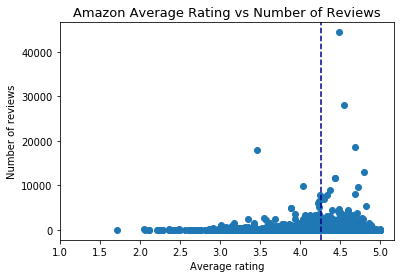

In [10]:
plt.scatter(amazon.average,amazon.rating_count)
plt.title('Amazon Average Rating vs Number of Reviews', size = 13)
plt.axvline(amazon.describe().average['mean'], 0, color='darkblue', linestyle='--')
plt.xlabel('Average rating')
plt.ylabel('Number of reviews')
plt.xticks(np.arange(1,5.5,0.5))
plt.show()

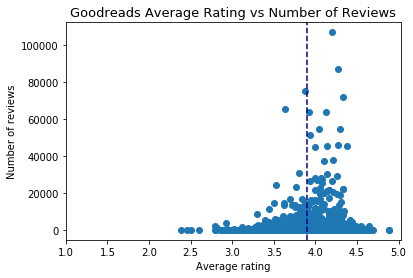

In [11]:
plt.scatter(gr.average_rating,gr.total_text_reviews_count)
plt.title('Goodreads Average Rating vs Number of Reviews', size = 13)
plt.axvline(gr.describe().average_rating['mean'], 0, color='darkblue', linestyle='--')
plt.xlabel('Average rating')
plt.ylabel('Number of reviews')
plt.xticks(np.arange(1,5.5,0.5))
plt.show()

## Amazon rating - Goodreads rating

In [12]:
amazon_gr = pd.merge(amazon, gr, how = 'inner', on ='asin')

In [13]:
amazon_gr['rating_diff'] = amazon_gr['average'] -  amazon_gr['average_rating']

In [14]:
am_gr = pd.DataFrame(amazon_gr, columns = ['asin','rating_diff','average','rating_count', 'text_reviews_count_x','total_ratings_count',
                                           'total_text_reviews_count', 'average_rating','genres'])

In [15]:
am_gr = am_gr.rename(columns = {'average':'amazon_average', 'rating_count': 'amazon_rating_count', 
                                'text_reviews_count_x': 'amazon_text_reviews_count', 'total_ratings_count': 'gr_rating_count',
                                'total_text_reviews_count':'gr_text_reviews_count', 'average_rating': 'gr_average'})

In [16]:
am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,genres
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction"
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction"
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry"
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry"
...,...,...,...,...,...,...,...,...,...
4953,0060753382,0.35,4.73,22,22,504,21,4.38,"Mystery, Thriller & Suspense, Mystery"
4954,0060779381,0.52,4.36,28,28,487,28,3.84,"Literature & Fiction, United States"
4955,0060783400,0.41,4.23,22,22,271,45,3.82,"Christian Books & Bibles, Churches & Church L..."
4956,0060784563,0.55,4.26,211,211,467,59,3.71,"Self-Help, Relationships"


In [17]:
am_gr.describe()

,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average
count,4958.000000,4958.000000,4958.000000,4958.000000,4.958000e+03,4958.000000,4958.000000
mean,0.354804,4.259697,205.451392,205.403792,1.974577e+04,818.274102,3.904893
std,0.345727,0.429768,1020.912069,1020.653953,1.295549e+05,3803.279868,0.291798
min,-1.650000,1.710000,6.000000,6.000000,7.000000e+00,1.000000,2.380000
25%,0.190000,4.040000,23.000000,23.000000,3.110000e+02,31.000000,3.730000
50%,0.390000,4.330000,46.000000,46.000000,1.275000e+03,100.000000,3.920000
75%,0.560000,4.570000,126.000000,126.000000,6.009000e+03,360.000000,4.110000
max,1.820000,5.000000,44381.000000,44368.000000,4.255389e+06,87069.000000,4.890000


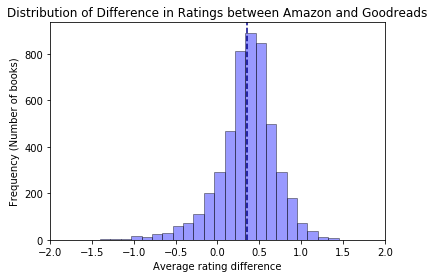

In [18]:
sns.distplot(am_gr.rating_diff, hist=True, kde=False,  
             bins=28, color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.xlabel('Average rating difference')
plt.ylabel('Frequency (Number of books)')
plt.title('Distribution of Difference in Ratings between Amazon and Goodreads')
plt.xlim(-2,2)
plt.axvline(am_gr.describe().rating_diff['mean'], 0, color='darkblue', linestyle='--')
plt.show()

In [19]:
am_gr['rating_count'] = am_gr['amazon_rating_count']+am_gr['gr_rating_count']
am_gr['text_reviews_count'] = am_gr['amazon_text_reviews_count']+am_gr['gr_text_reviews_count']
am_gr

,asin,rating_diff,amazon_average,amazon_rating_count,amazon_text_reviews_count,gr_rating_count,gr_text_reviews_count,gr_average,genres,rating_count,text_reviews_count
0,0001713353,0.56,4.83,54,54,637,55,4.27,"Childrens Books, Literature & Fiction",691,109
1,0001061240,0.25,4.87,45,45,221,36,4.62,"Childrens Books, Literature & Fiction",266,81
2,0001711296,0.15,4.44,107,107,738,65,4.29,Literature & Fiction,845,172
3,0002007649,-0.20,3.37,19,19,356,41,3.57,"Science & Math, Chemistry",375,60
4,0001716069,0.79,4.61,59,59,1559,102,3.82,"Literature & Fiction, Poetry",1618,161
...,...,...,...,...,...,...,...,...,...,...,...
4953,0060753382,0.35,4.73,22,22,504,21,4.38,"Mystery, Thriller & Suspense, Mystery",526,43
4954,0060779381,0.52,4.36,28,28,487,28,3.84,"Literature & Fiction, United States",515,56
4955,0060783400,0.41,4.23,22,22,271,45,3.82,"Christian Books & Bibles, Churches & Church L...",293,67
4956,0060784563,0.55,4.26,211,211,467,59,3.71,"Self-Help, Relationships",678,270


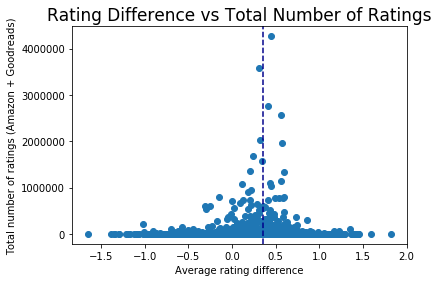

In [20]:
plt.scatter(am_gr.rating_diff, am_gr.rating_count)
plt.title('Rating Difference vs Total Number of Ratings', size = 17)
plt.xlabel('Average rating difference', size=10)
plt.ylabel('Total number of ratings (Amazon + Goodreads)', size=10)
plt.axvline(am_gr.describe().rating_diff['mean'], 0, color='darkblue', linestyle='--')
plt.show()

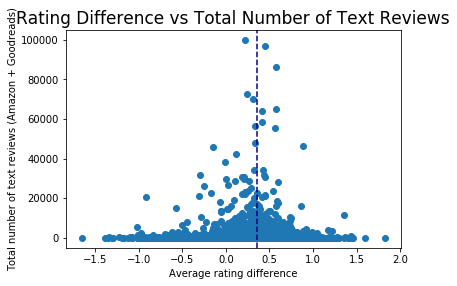

In [21]:
plt.scatter(am_gr.rating_diff, am_gr.text_reviews_count)
plt.title('Rating Difference vs Total Number of Text Reviews', size = 17)
plt.xlabel('Average rating difference', size =10)
plt.ylabel('Total number of text reviews (Amazon + Goodreads)', size=10)
plt.axvline(am_gr.describe().rating_diff['mean'], 0, color='darkblue', linestyle='--')
plt.show()

In [22]:
#genres = am_gr.genres

In [23]:
'''unique_genres = dict()
for genre in genres:
    genre_split = genre.split(',')
    for g in genre_split:
        if g in unique_genres:
            unique_genres[g] += 1
        else:
            unique_genres[g] = 1'''

"unique_genres = dict()\nfor genre in genres:\n    genre_split = genre.split(',')\n    for g in genre_split:\n        if g in unique_genres:\n            unique_genres[g] += 1\n        else:\n            unique_genres[g] = 1"

In [24]:
#unique_genres

In [25]:
'''filtered_genres = dict()
for k,v in unique_genres.items():
    if v > 1000:
        filtered_genres[k] = v'''

'filtered_genres = dict()\nfor k,v in unique_genres.items():\n    if v > 1000:\n        filtered_genres[k] = v'

# Book Metadata

In [26]:
book = pd.read_csv('gr_metadata_sample.csv')
book

,asin,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,...,publisher,num_pages,format,description,cleaned_description,gr_countDes_before,gr_countDes_after,cleaned_genres,gr_countText_before,gr_countText_after
0,000100039X,4.23,186297,163625,5535,220088,196528,8847,2010.0,1.0,...,Rupa & Co,127.0,Paperback,"Kahlil Gibran's masterpiece, The Prophet, is o...",tahsil vibrants masterpiece prophet one belove...,106.0,66.0,"poetry, fiction, non-fiction",42320,17834
1,0001053655,4.08,16,33,6,676,1552,85,1997.0,NaN,...,HarperCollins,268.0,Hardcover,NaN,NaN,NaN,NaN,"history, historical fiction, biography, non-fi...",158,75
2,0001061240,4.62,10,22,2,221,603,36,1959.0,12.0,...,Western Publishing Company,324.0,Hardcover,NaN,NaN,NaN,NaN,"poetry, children",49,18
3,000161102X,3.86,33,74,4,2929,5786,75,NaN,NaN,...,NaN,190.0,NaN,The snobby girls at the fashionable boarding s...,snobby girl fashionable board school ridicule ...,47.0,25.0,"children, fiction, young-adult, history, histo...",130,61
4,0001711296,4.29,604,1319,48,738,1564,65,NaN,NaN,...,Random House,63.0,NaN,NaN,NaN,NaN,NaN,"children, fiction, poetry, fantasy, paranormal",257,117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,006078671X,4.12,3117,4987,238,3870,6289,276,2006.0,1.0,...,William Morrow,352.0,Hardcover,"""Seamless in its storytelling and enthralling ...",new year eve scotland yard inspector repledge ...,144.0,63.0,"mystery, thriller, crime, fiction, history, hi...",4051,1839
4996,0060786744,4.02,59,138,8,3299,5553,263,2007.0,12.0,...,Harper,416.0,Paperback,"""Full of suspense, surprises, and sympathetic ...",full suspense surprise sympathetic character f...,150.0,96.0,"mystery, thriller, crime, fiction, history, hi...",133,65
4997,0060786841,4.37,327,683,12,775,1948,48,2006.0,8.0,...,HarperOne,2208.0,Paperback,The HarperCollins Study Bible--Student Edition...,harpercollins study biblestudent edition landm...,66.0,45.0,"non-fiction, poetry, history, historical ficti...",383,163
4998,0060787031,3.82,1626,3597,42,2155,4937,71,2005.0,9.0,...,William Morrow Paperbacks,368.0,Paperback,Go further under the covers and stay in bed a ...,go cover stay bed little long marian eye win f...,180.0,100.0,"non-fiction, fiction",82,42


In [27]:
book.describe()

,average_rating,ratings_count,reviews_count,text_reviews_count,total_ratings_count,total_reviews_count,total_text_reviews_count,publication_year,publication_month,publication_day,num_pages,gr_countDes_before,gr_countDes_after,gr_countText_before,gr_countText_after
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5000.000000,4807.000000,4649.000000,4596.000000,4774.000000,4839.000000,4687.000000,5000.00000,5000.000000
mean,3.904638,2096.221400,3920.327800,112.544600,2.042337e+04,3.095409e+04,848.552600,2002.236530,6.315337,13.510879,329.932132,149.658400,81.607425,2004.75780,887.822400
std,0.292021,10362.688039,18551.880648,470.918927,1.355211e+05,1.650722e+05,4145.522882,9.531886,3.372324,10.806322,224.750505,95.918581,53.407555,7611.45056,3319.335453
min,2.380000,0.000000,0.000000,0.000000,7.000000e+00,2.000000e+01,1.000000,1900.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.00000,1.000000
25%,3.730000,54.000000,117.000000,7.000000,3.110000e+02,7.700000e+02,31.000000,2000.000000,3.000000,2.000000,229.000000,81.000000,42.000000,113.00000,52.000000
50%,3.920000,167.000000,379.500000,19.000000,1.279500e+03,2.817500e+03,100.000000,2004.000000,6.000000,12.000000,320.000000,135.000000,73.000000,383.00000,174.000000
75%,4.110000,665.000000,1492.000000,62.000000,6.013000e+03,1.168175e+04,361.250000,2007.000000,9.000000,25.000000,400.000000,192.000000,105.000000,1240.50000,559.250000
max,4.890000,348674.000000,686353.000000,15360.000000,4.255389e+06,4.878002e+06,106728.000000,2019.000000,12.000000,31.000000,8430.000000,1166.000000,567.000000,234148.00000,103340.000000


In [28]:
book_am_gr = pd.merge(am_gr, book, how = 'inner', on ='asin')

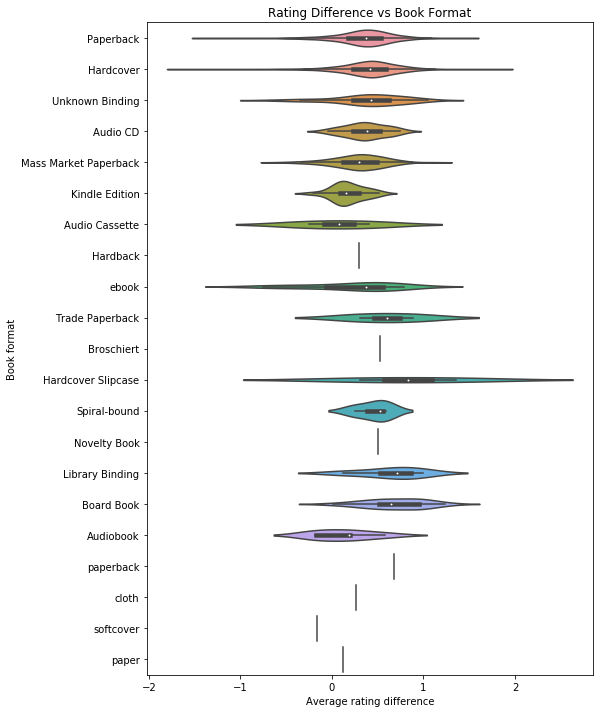

In [29]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="rating_diff", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Average rating difference')
plt.ylabel('Book format')
plt.title('Rating Difference vs Book Format')
plt.show()

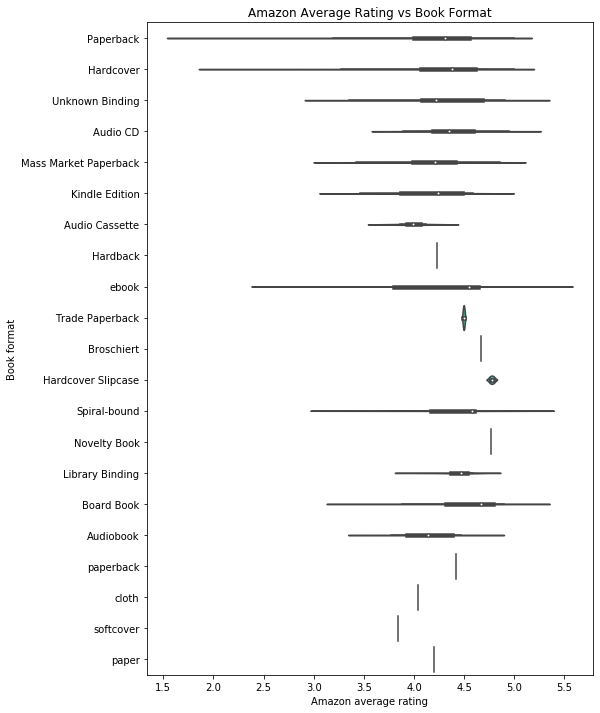

In [30]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="amazon_average", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Amazon average rating')
plt.ylabel('Book format')
plt.title('Amazon Average Rating vs Book Format')
plt.show()

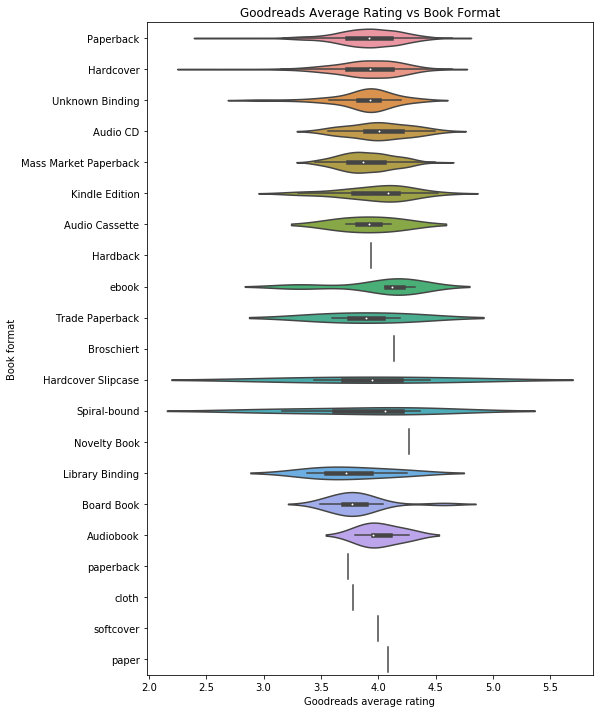

In [31]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="gr_average", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Goodreads average rating')
plt.ylabel('Book format')
plt.title('Goodreads Average Rating vs Book Format')
plt.show()

In [32]:
book_am_gr = book_am_gr.rename(columns = {'genres_x':'amazon_genres', 'genres_y': 'gr_genres'})

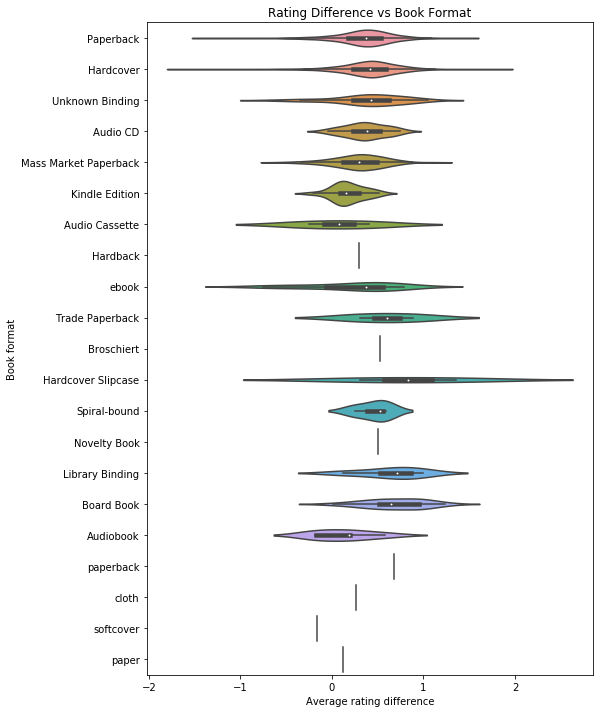

In [33]:
plt.figure(figsize=(8,12)) 
sns.violinplot(x="rating_diff", y="format", data=book_am_gr, figsize=(20,50))
plt.xlabel('Average rating difference')
plt.ylabel('Book format')
plt.title('Rating Difference vs Book Format')
plt.show()